In [29]:
import pandas as pd

In [30]:
data=pd.read_csv('train.csv')

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set()

In [34]:
font={
    'size':18
}

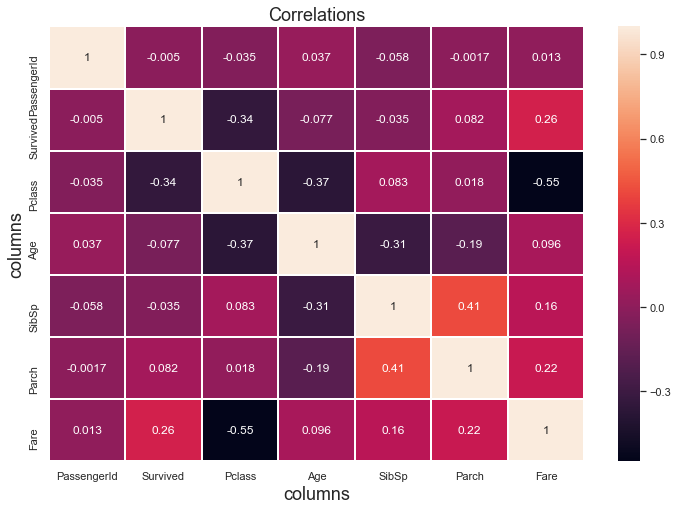

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,linewidths=1,linecolor='w')
plt.xlabel('columns', fontdict=font)
plt.ylabel('columns', fontdict=font)
plt.xticks(rotation=0)
plt.title('Correlations', fontdict=font)
plt.savefig('1.png')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [37]:
data.Sex[data.Sex == 'male'] = 1
data.Sex[data.Sex == 'female'] =0

C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [39]:
numerical_data=data[['PassengerId','Pclass','Fare','Age','Sex','Parch','SibSp']].copy()

In [40]:
numerical_data.isnull().sum()

PassengerId      0
Pclass           0
Fare             0
Age            177
Sex              0
Parch            0
SibSp            0
dtype: int64

In [54]:
numerical_data['Age']=numerical_data['Age'].fillna(22)

In [55]:
survival_data=data['Survived'].copy()

In [56]:
from sklearn.model_selection import train_test_split 

In [57]:
X,x_test,Y,y_test=train_test_split(numerical_data,survival_data,test_size=0.3,random_state=5)

In [58]:
from sklearn.linear_model import LogisticRegression


In [59]:
model=LogisticRegression()


In [60]:
model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
coefficients=model.coef_

In [62]:
coeff_dict={
    'PassengerId':coefficients[0][0],
    'Pclass':coefficients[0][1],
    'Fare' :coefficients[0][2],
    'Age' :coefficients[0][3],
    'Sex' :coefficients[0][4],
    'Parch' :coefficients[0][5],
    'SibSp' :coefficients[0][6]
}

In [63]:
coeff_dict=pd.Series(coeff_dict)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

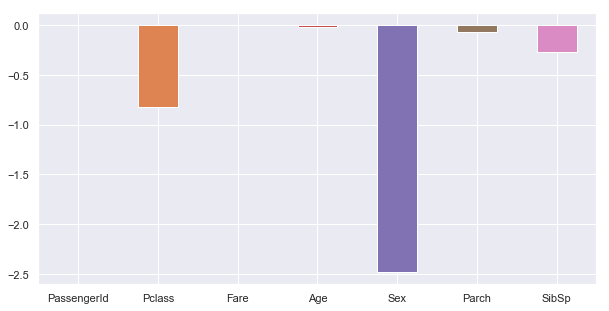

In [64]:
plt.figure(figsize=(10,5))
coeff_dict.plot(kind='bar')
plt.xticks(rotation=0)

In [65]:
predictions=model.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [67]:
confusion= confusion_matrix(predictions,y_test)

In [68]:
confusion

array([[155,  34],
       [ 12,  67]], dtype=int64)

In [69]:
score= accuracy_score(predictions,y_test)

In [70]:
score

0.8283582089552238

### importing the test dataset

In [ ]:
test_data=pd.read_csv('test.csv')

In [ ]:
test_data.head()

In [ ]:
test_data=test_data[['PassengerId','Pclass','Fare','Age','Sex','SibSp','Parch']].copy()

In [ ]:
test_data.Sex[test_data.Sex == 'male'] = 1
test_data.Sex[test_data.Sex == 'female'] =0

In [ ]:
test_data.head()

In [ ]:
test_data=test_data[['PassengerId','Pclass','Fare','Age','Sex','SibSp','Parch']].copy()

In [ ]:
test_data['Fare']=test_data['Fare'].fillna(10)

In [ ]:
test_data['Age']=test_data['Age'].fillna(22)

In [ ]:
test_data.isnull().sum()

In [ ]:
test_predictions=model.predict(test_data)

In [ ]:
test_predictions[:3]

In [ ]:
test_predictions_df={
    'PassengerId':test_data['PassengerId'],
    'Survived': test_predictions
}

In [ ]:
test_predictions_df=pd.DataFrame(test_predictions_df)

In [ ]:
test_predictions_df.head()

In [ ]:
test_predictions_df=test_predictions_df.set_index('PassengerId')

In [ ]:
test_predictions_df.to_csv('Submission.csv')